In [27]:

import numpy as np

def catmull_rom_t(control_x, control_y, T):
    def q(t):
        return 1/2 * np.array([t**3, t**2, t, 1]) @ np.array([
            [-1/T, (4*T-1)/T, (-4*T +1)/T, 1/T], 
            [2/T, (-6*T+1)/T, (6*T-2)/T, -1/T], 
            [-1/T, 0, 1/T, 0], 
            [0, 2, 0, 0]
        ]) @ np.array([control_x, control_y]).T
    return q

# Teste
# control_x = [1, 2, 3, 5, 7, 4, 2, 1, 2, 3, 5, 7]
# control_y = [2, 4, 6, 7, 1, 1, 2, 2, 4, 6, 7, 1]
control_x = [31.9, 32, 33, 35, 37, 38, 35, 32, 31, 30.9]
control_y = [44.9, 45, 47, 47, 50, 53, 55, 51, 49, 48.9]
T = 1
t = np.arange(0, 1.1, 0.1)
N = len(control_x)

interpolated_points = np.zeros((len(t), 2))
X = np.zeros((len(t), N-3))
Y = np.zeros((len(t), N-3))

vx = np.zeros((N-3, 4))
vy = np.zeros((N-3, 4))
for i in range(N-3):
    vx[i, :] = control_x[i:i+4]
    vy[i, :] = control_y[i:i+4]

S = vx.shape

for i in range(S[0]):
    vx1 = vx[i, :]
    vy1 = vy[i, :]
    q_aux = catmull_rom_t(vx1, vy1, T)
    for j in range(len(t)):
        interpolated_points[j] = q_aux(t[j])
    X[:, i] = interpolated_points[:, 0]
    Y[:, i] = interpolated_points[:, 1]

print("Interpolated X points:\n", X)
print("Interpolated Y points:\n", Y)

Interpolated X points:
 [[32.      33.      35.      37.      38.      35.      32.     ]
 [32.05905 33.1595  35.2045  37.1585  37.862   34.691   31.81495]
 [32.1264  33.336   35.416   37.328   37.656   34.368   31.6576 ]
 [32.20235 33.5265  35.6315  37.4995  37.394   34.037   31.52465]
 [32.2872  33.728   35.848   37.664   37.088   33.704   31.4128 ]
 [32.38125 33.9375  36.0625  37.8125  36.75    33.375   31.31875]
 [32.4848  34.152   36.272   37.936   36.392   33.056   31.2392 ]
 [32.59815 34.3685  36.4735  38.0255  36.026   32.753   31.17085]
 [32.7216  34.584   36.664   38.072   35.664   32.472   31.1104 ]
 [32.85545 34.7955  36.8405  38.0665  35.318   32.219   31.05455]
 [33.      35.      37.      38.      35.      32.      31.     ]]
Interpolated Y points:
 [[45.      47.      47.      50.      53.      55.      51.     ]
 [45.13205 47.0675  47.1785  50.3045  53.2675  54.834   50.71045]
 [45.3104  47.08    47.408   50.616   53.56    54.552   50.4416 ]
 [45.52335 47.0525  47.6795

GIF salvo como 'interpolacao_catmull_rom.gif'


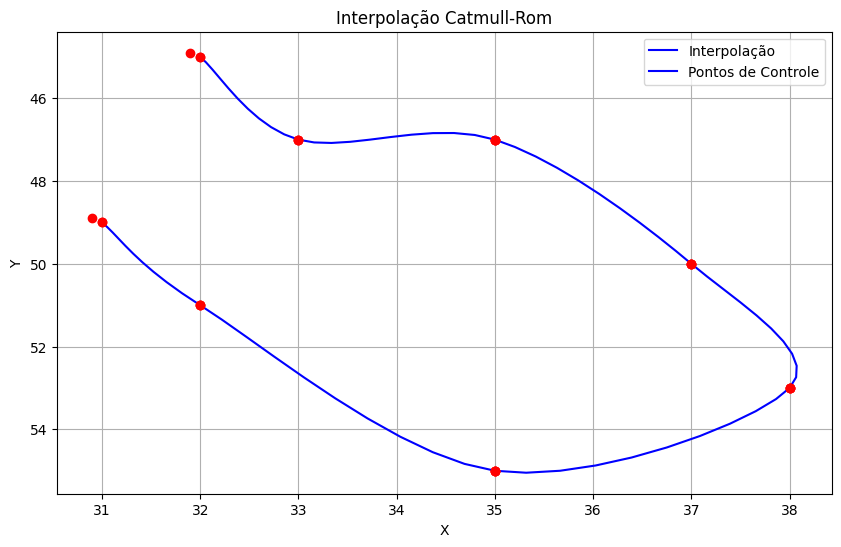

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
# Lista para armazenar os frames
frames = []

# Criação da animação com matplotlib e armazenamento de frames com Pillow
plt.figure(figsize=(10, 6))

for i in range(N-3):
    plt.clf()  # Limpa a figura antes de plotar o próximo frame
    
    # Plota os dados interpolados e pontos de controle até o índice i
    plt.plot(X[:, :i+1], Y[:, :i+1], 'b-')  # Interpolação
    plt.plot(vx[:i+1], vy[:i+1], 'ro')  # Pontos de controle
    
    plt.gca().invert_yaxis()
    plt.title('Interpolação Catmull-Rom')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(['Interpolação', 'Pontos de Controle'])
    plt.grid(True)
    
    # Salva o frame atual como uma imagem
    plt.draw()
    os.makedirs("frames", exist_ok=True)  # Cria o diretório 'frames' se ele não existir
    frame_path = f"./frames/frame_{i}.png"
    plt.savefig(frame_path)  # Salva o frame atual
    frames.append(Image.open(frame_path))  # Adiciona o frame como imagem na lista

# Cria o GIF a partir dos frames salvos
frames[0].save("interpolacao_catmull_rom.gif", save_all=True, append_images=frames[1:], duration=300, loop=0)

print("GIF salvo como 'interpolacao_catmull_rom.gif'")
plt.show()
